In [29]:


%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse, Circle

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv(city_data_to_load)
# Read the City and Ride Data
ride_df=pd.read_csv(ride_data_to_load)

#city_df.head()
#ride_df.head()
# Combine the data into a single dataset

combined_data = pd.merge(city_df, ride_df, on="city")


# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

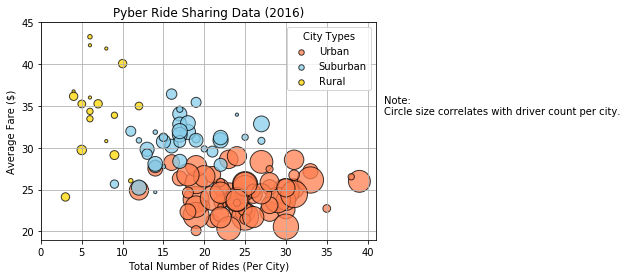

<Figure size 432x288 with 0 Axes>

In [34]:
# Obtain the x and y coordinates for each of the three city types

#Average Fare ($) Per City
city_grp=combined_data.groupby("city")

avg_per_city=city_grp["fare"].mean()

city_avg_fare=pd.DataFrame(avg_per_city)

city_avg_fare=city_avg_fare.rename(columns={"fare":"avg_fare"})

city_avg_fare

#Total Number of Rides Per City

#city_grp=combined_data.groupby("city")

rides_per_city=city_grp["ride_id"].count()

tot_rides_city=pd.DataFrame(rides_per_city)

tot_rides_city=tot_rides_city.rename(columns={"ride_id":"tot_rides"})

tot_rides_city


#Total Number of Drivers Per City

#tot_drivers_city=pd.DataFrame(drivers_per_city)

tot_drivers_city=combined_data[["city", "driver_count"]].drop_duplicates("city")

tot_drivers_city=tot_drivers_city.rename(columns={"driver_count":"tot_drivers"})

tot_drivers_city

#combine dataframes

ctype = combined_data[["city", "type"]].drop_duplicates("city")


combined_df = pd.merge(ctype, city_avg_fare, how="inner", on="city")
combined_df=pd.merge(combined_df, tot_rides_city, how="inner", on="city")
combined_df=pd.merge(combined_df, tot_drivers_city, how="inner", on="city")
# Convert the "horsepower" column to numeric so the data can be used
#car_data['horsepower'] = pd.to_numeric(car_data['horsepower'])
combined_df["tot_rides"] =pd.to_numeric(combined_df["tot_rides"])
combined_df["avg_fare"] =pd.to_numeric(combined_df["avg_fare"])
combined_df["tot_drivers"] =pd.to_numeric(combined_df["tot_drivers"])




#City Type (Urban, Suburban, Rural)
#df.loc[df['column_name'] == some_value]

urban=combined_df.loc[combined_df["type"] == "Urban"]
suburban=combined_df.loc[combined_df["type"] == "Suburban"]
rural=combined_df.loc[combined_df["type"] == "Rural"]

#urban
#suburban


# Create a scatter plot which compares MPG to horsepower
#car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(8,8),title="Horsepower Vs. MPG")

ax = urban.plot(kind="scatter",x='tot_rides', y="avg_fare",color='coral', s=urban["tot_drivers"] *10,
                label = "Urban",alpha = .75,edgecolor="black"
                )

suburban.plot(kind="scatter",x='tot_rides', y="avg_fare",color='skyblue', s=suburban["tot_drivers"] *10, 
              label = "Suburban", alpha = .75,edgecolor="black"
              , ax = ax)


rural.plot(kind="scatter",x='tot_rides', y="avg_fare",color='gold', s=rural["tot_drivers"] *10, 
           label = "Rural", alpha = .75, edgecolor="black",grid=True, 
           ax = ax)



# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value


# Incorporate the other graph properties

# Create a legend
# Adds a legend and sets its location to the lower right
# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.xlim(0,41,5)
plt.ylim(19,45,5)
#plt.legend(loc="best")

# Create a legend
legend = plt.legend(title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,34,"Note: ""\n"+"Circle size correlates with driver count per city.")

# Save Figure
# Saves an image of our chart so that we can view it in a folder
plt.savefig("Images/BubblePlot.png")
plt.show()
plt.tight_layout()


## Total Fares by City Type

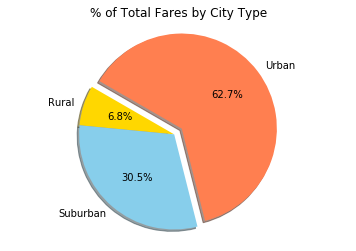

In [48]:
#combined_data

city_type=combined_data.groupby("type")

tot_fare=city_type["fare"].sum()

# The colors of each section of the pie chart
colors = ["gold", "skyblue","coral"]

#pie chart build
labels = tot_fare.index

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .1]
plt.pie(tot_fare, startangle = 150, colors = colors, labels = labels,explode = explode,autopct = "%1.1f%%", shadow = True,
       pctdistance=.6,center=(0,0),frame=False,rotatelabels=False,wedgeprops={})

 

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.savefig("Images/Total_Fares_ByCity_type.png")
plt.show()

## Total Rides by City Type

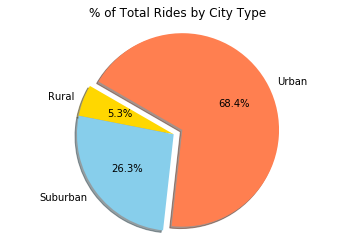

In [47]:
#combined_data

city_type=combined_data.groupby("type")

tot_rides=city_type["ride_id"].count()

# The colors of each section of the pie chart
colors = ["gold", "skyblue","coral"]

#pie chart build
labels = tot_rides.index

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .1]
plt.pie(tot_rides, startangle = 150, colors = colors, labels = labels,explode = explode,autopct = "%1.1f%%", shadow = True,
       pctdistance=.6,center=(0,0),frame=False,rotatelabels=False,wedgeprops={})
        

#pie chart display
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.savefig("Images/Total_Rides_ByCity_type.png")
plt.show()


## Total Drivers by City Type

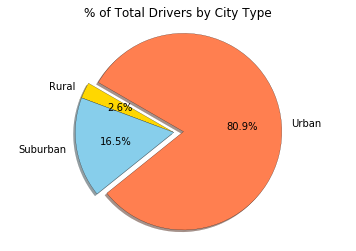

In [46]:
#combined_data

city_type=city_df.groupby("type")

tot_drivers=city_type["driver_count"].sum()

#tot_drivers=city_type["driver_count"]

# The colors of each section of the pie chart
colors = ["gold", "skyblue","coral"]

#pie chart build
labels = tot_drivers.index
#labels=["Rural","Suburban","Urban"]

#colors and exploe the same for all pie charts, reference here

#colors and exploe the same for all pie charts, reference here
explode = [0 , 0, .1]
plt.pie(tot_drivers, startangle = 150, colors = colors, labels = labels,explode = explode,autopct = "%1.1f%%", shadow = True,
       pctdistance=.6,center=(0,0),frame=False,rotatelabels=False,wedgeprops={'linewidth': .2, 'edgecolor': 'black'})
        

#pie chart display
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.savefig("Images/Total_Drivers_ByCity_type.png")
plt.show()